In [106]:
using Pkg
Pkg.status()
VERSION

Status `C:\Users\umutc\.julia\environments\v1.11\Project.toml`
⌅ [7d9fca2a] Arpack v0.5.3
  [6e4b80f9] BenchmarkTools v1.5.0
  [861a8166] Combinatorics v1.0.2
  [a93c6f00] DataFrames v1.7.0
  [864edb3b] DataStructures v0.18.20
  [b7d42ee7] Einsum v0.4.1
  [d853e229] GroupSlices v0.0.3
  [34004b35] HypergeometricFunctions v0.3.25
  [c8e1da08] IterTools v1.10.0
  [b964fa9f] LaTeXStrings v1.4.0
  [23fbe1c1] Latexify v0.16.5
  [6fe1bfb0] OffsetArrays v1.15.0
  [91a5bcdd] Plots v1.40.9
  [92933f4c] ProgressMeter v1.10.2
⌃ [6e0679c1] QuantumOptics v1.0.9
⌃ [295af30f] Revise v3.6.4
  [2913bbd2] StatsBase v0.34.4
  [afbbf031] TypedPolynomials v0.4.1
Info Packages marked with ⌃ and ⌅ have new versions available. Those with ⌃ may be upgradable, but those with ⌅ are restricted by compatibility constraints from upgrading. To see why use `status --outdated`


v"1.11.2"

In [107]:
using LinearAlgebra
using OffsetArrays
using Plots
using ProgressMeter
using QuantumOptics
using Revise
using SparseArrays
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("Hofstadter_SP.jl")

In [108]:
Nx = 3
Ny = 3
p = 1
q = 3
pn = 2
U = 1

N = Nx*Ny
NPhi0 = Int(Nx*Ny*(p/q))
Cut_Off = NPhi0
Cut_Off = 3

3

In [109]:
matrix = Hofstadter_SP(Nx, Ny, p / q, 0);

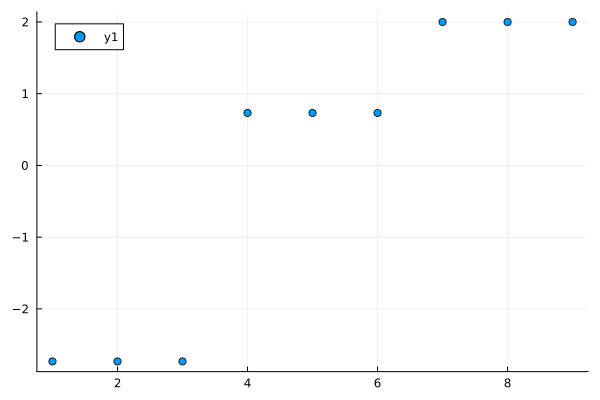

In [110]:
ϵ_sp, λ_sp = eigen(Matrix(matrix))
scatter(real(ϵ_sp))

In [111]:
HardCore = true
H_proj_hardcore, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, U, matrix, Cut_Off, HardCore);

In [112]:
ϵ_hard_core_proj, psi_hard_core = eigenstates(H_proj_hardcore);

In [113]:
HardCore = false
H_proj_finite, P, Pt, basis_cut_mb = H_Hubbard_Projection(N, pn, U, matrix, Cut_Off, HardCore);

In [114]:
ϵ_finite, psi_finite = eigenstates(H_proj_finite);

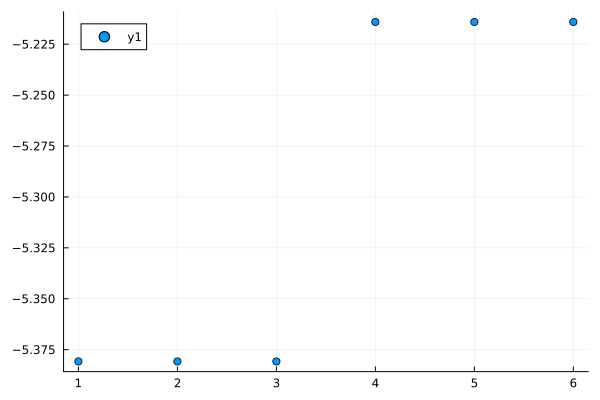

In [115]:
scatter(ϵ_finite)

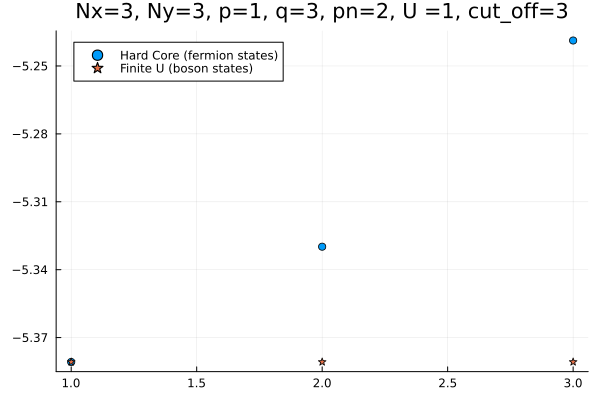

In [116]:
n=1
m=3
scatter(ϵ_hard_core_proj[n:m], label="Hard Core (fermion states)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U), cut_off=$(Cut_Off)")
scatter!(ϵ_finite[n:m], label="Finite U (boson states)",marker=:star)

# WHEN **U IS ENOUGH BIGGER**, FINITE ENERGIES DON'T CLOSE TO HARD-CORE ENERGIES JUST FOR HOFSTADTER MODEL !

# WITHOUT PROJECTION

In [117]:
HardCore = true
H_full_hard_core, basis_mb = H_Hubbard(N, U, pn, matrix, HardCore);

In [118]:
E_full_hard_core, psi_full_hard_core = eigenstates(dense(H_full_hard_core));

In [119]:
HardCore = false
H_full_finite, basis_mb =  H_Hubbard(N, U, pn, matrix, HardCore);

In [120]:
E_full_finite, psi_full_finite = eigenstates(dense(H_full_finite));

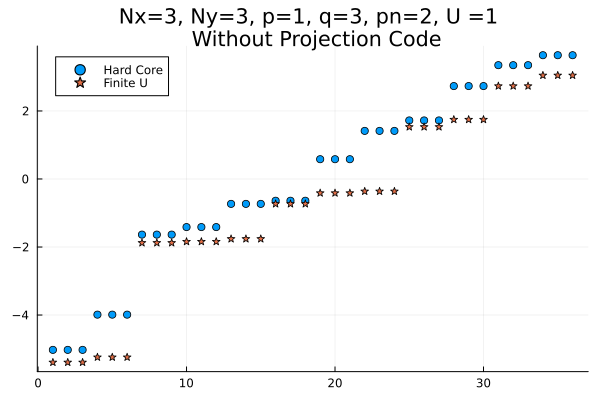

In [121]:
n=1
m=36
scatter(E_full_hard_core[n:m], label="Hard Core", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U) \n Without Projection Code")
scatter!(E_full_finite[n:m], label="Finite U",marker=:star)

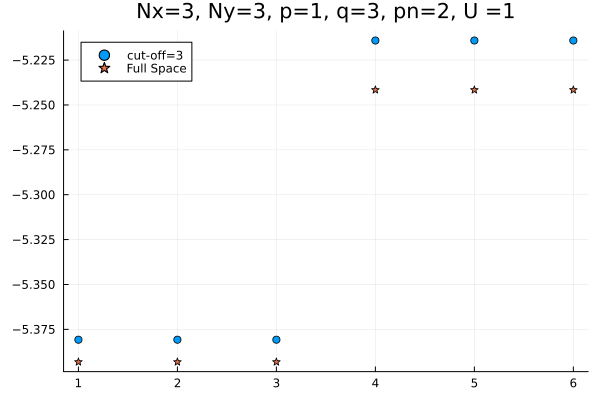

In [128]:
n=1
m=6
scatter(ϵ_finite[n:m], label="cut-off=$(Cut_Off)", title="Nx=$(Nx), Ny=$(Ny), p=$(p), q=$(q), pn=$(pn), U =$(U)")
scatter!(E_full_finite[n:m], label="Full Space",marker=:star)

In [129]:
ϵ_finite, E_full_finite[1:6]

([-5.380768281804427, -5.380768281804422, -5.380768281804421, -5.214101615137757, -5.214101615137754, -5.214101615137752], [-5.393169542782313, -5.393169542782304, -5.393169542782298, -5.241618438170486, -5.241618438170483, -5.241618438170457])

In [88]:
psi_finite[2].data'*number(basis_cut_mb).data*psi_finite[2].data

2.0 + 0.0im

In [86]:
psi_full_finite[1].data'*number(basis_mb).data*psi_full_finite[1].data

2.0 + 0.0im

# E_proj_hard_core vs E_full_hard_core

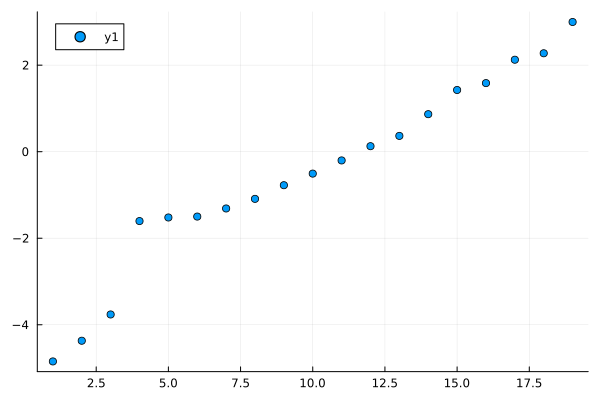

In [178]:
scatter(ϵ_hard_core_proj[1:19])

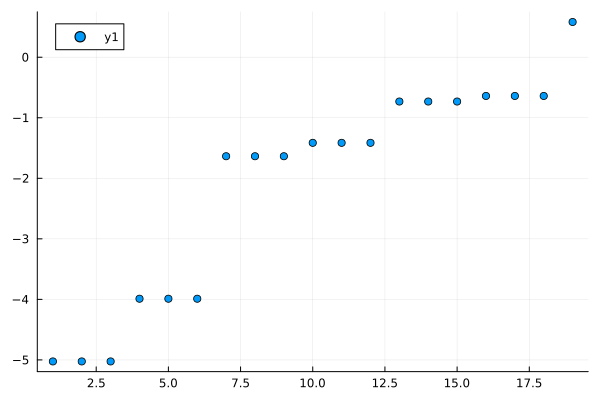

In [179]:
scatter(E_full_hard_core[1:19])